# GMU ECE 527 - Computer Exercise #8 Part 2 - Code
**Stewart Schuler - G01395779**\
**20241205**

In [1]:
import  os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential, Model

from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib

from PIL import Image
from keras.utils import to_categorical

import random
random.seed(1)

2024-12-06 11:59:20.102251: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 11:59:20.116286: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-06 11:59:20.164718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733504360.236232 3631773 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733504360.255445 3631773 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 11:59:20.292903: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')

2024-12-06 11:59:38.747741: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
data = np.load('datasets/train_data_224.npz')
images = data['images']  # Access the images array
labels = data['labels']  # Access the labels array
labels = to_categorical(labels,20)
images = images/255

print(images.shape)
print(labels.shape)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.01, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
num_classes = y_train.shape[1]

(3132, 224, 224, 3)
(3132, 20)
(3100, 224, 224, 3)
(3100, 20)
(32, 224, 224, 3)
(32, 20)


In [4]:
inputs = layers.Input(shape=(224, 224, 3))
new_layers = layers.RandomFlip()(inputs)
new_layers = layers.RandomRotation(0.1)(new_layers)
new_layers = base_model(new_layers)

new_layers = layers.Dense(1024, activation='relu')(new_layers)
outputs = layers.Dense(num_classes, activation='softmax')(new_layers)

model = keras.Model(inputs, outputs)

In [5]:
# Add custom layers on top of the base model
inputs = layers.Input(shape=(224, 224, 3))  # Define input shape
x = layers.RandomFlip("horizontal_and_vertical")(inputs)  # Add random flipping
x = layers.RandomRotation(0.2)(x)  # Add random rotation
x = base_model(x, training=False)  # Use the base model
x = layers.Dense(512, activation='relu')(x)  # Add a dense layer for feature extraction
outputs = layers.Dense(num_classes, activation='softmax')(x)  # New output layer for 10 classes

# Create the new model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,924,116 (11.15 MB)

 Trainable params: 2,890,004 (11.02 MB)

 Non-trainable params: 34,112 (133.25 KB)

(3100, 224, 224, 3)
(3100, 20)
(32, 224, 224, 3)
(32, 20)
Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - accuracy: 0.0608 - loss: 3.2829 - val_accuracy: 0.0938 - val_loss: 3.1043
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.1044 - loss: 2.9998 - val_accuracy: 0.1875 - val_loss: 2.7762
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.1712 - loss: 2.7660 - val_accuracy: 0.2500 - val_loss: 2.4874
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.2752 - loss: 2.5537 - val_accuracy: 0.4062 - val_loss: 2.2184
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.3504 - loss: 2.3864 - val_accuracy: 0.6250 - val_loss: 1.9478
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.4441 - loss: 2.1748 - val_accuracy: 0.7500 - val_loss: 1.6730
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.4865 - loss: 2.0168 - val_accuracy: 0.7812 - val_loss: 1.4364
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - 

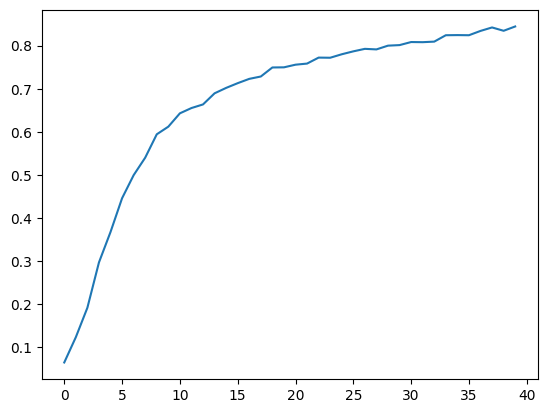

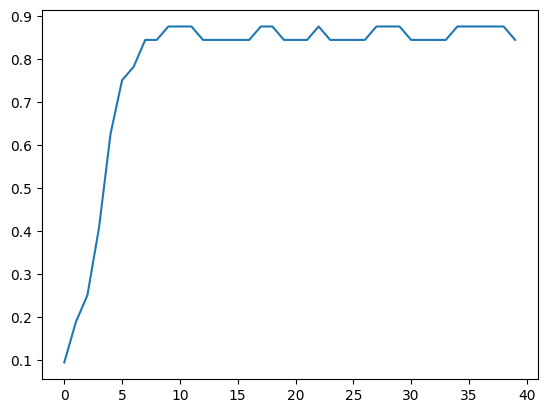

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
hist = model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, y_test), callbacks=None)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


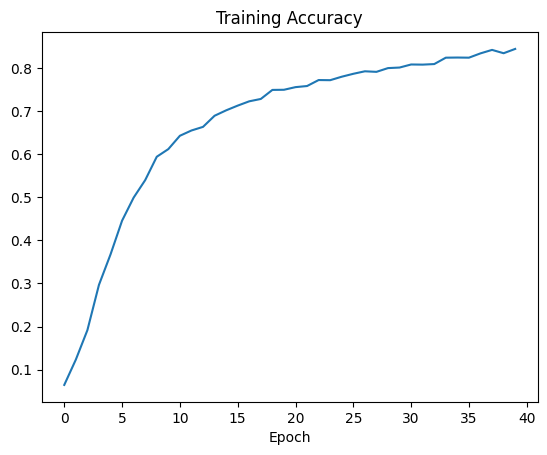

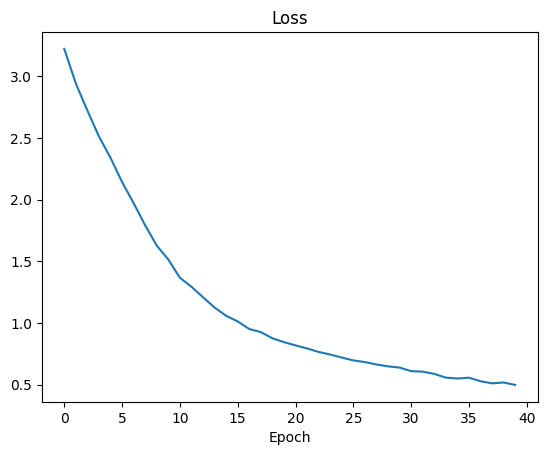

In [35]:
print(hist.history.keys())
plt.figure()
plt.plot( hist.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.savefig('figures/acc.png')
plt.figure()
plt.plot( hist.history['loss'], label='Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.savefig('figures/loss.png')

97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step


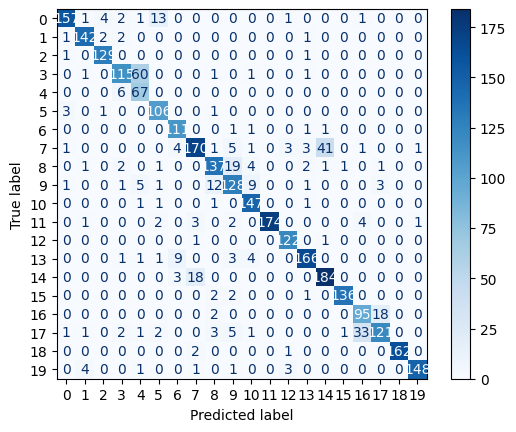

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_train)

cm = confusion_matrix(np.argmax(y_pred,axis=1), np.argmax(y_train, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.savefig('figures/cm.png')

In [9]:
model.save("model.5779.keras")